# More information about the dataset here : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [39]:
import numpy as np 
import plotly.graph_objs as go
import plotly.offline as py
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pyspark.sql import HiveContext
import pandas as pd
import pyspark

In [40]:
from pyspark import SparkContext
sc =SparkContext.getOrCreate()

In [41]:
cv = sc.textFile("breast_cancer_clean.csv")
cv.count()

570

In [42]:
## fonction
def splitter(lineOfText): 
     words = lineOfText.split(" ") 
     return len(words) 
def aggregate(numWordsLine1, numWordsLineNext): 
     totalWords = numWordsLine1 + numWordsLineNext 
     return totalWords

In [43]:
#Number of words
wordperline = cv.map(splitter)
totwords = wordperline.reduce(aggregate)
totwords

573

In [44]:
cv.collect();

In [45]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Python Spark create RDD example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [46]:
df = spark.read.format('com.databricks.spark.csv').\
                               options(header='true', \
                               inferschema='true').\
                load("breast_cancer_clean.csv")

In [47]:
#display part of the data 
df.show(5)

+---+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|_c0|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+---+---------+-----------+------------+--------------+---

In [48]:
#display the structure of the data
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- rad

In [49]:
#Showing Benign tumor cases.
words_filter = cv.filter(lambda x: 'B' in x)
filtered = words_filter.collect()

print ("Benign -> %s" % (filtered))

Benign -> ['19,B,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259', '20,B,13.08,15.71,85.63,520,0.1075,0.127,0.04568,0.0311,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.002425,14.5,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183', '21,B,9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773', '37,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.342,1.17,14.16,0.004352,0.004899,0.01343,0.01164,0.02671,0.001777,13.3,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169', '46,B,8.196,16.84,51.71,201.9,0.086,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.0

In [50]:
# we form a key value pair and map every string with a value of Tunisia.
words_map = cv.map(lambda x: (x, 'M'))
mapping = words_map.collect()
print("Key value pair -> %s" % (mapping))

Key value pair -> [(',diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst', 'M'), ('0,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189', 'M'), ('1,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902', 'M'), ('2,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.

In [51]:
#we can also check if the RDD is cached or not.
caching = cv.persist().is_cached 
print ( "Words got chached > %s" % (caching))

Words got chached > True


In [52]:
#we can select and show the rows with select and the names of the features
#for example we can show radius mean compared with texture mean
df.select('diagnosis','radius_mean','texture_mean').show(20)

+---------+-----------+------------+
|diagnosis|radius_mean|texture_mean|
+---------+-----------+------------+
|        M|      17.99|       10.38|
|        M|      20.57|       17.77|
|        M|      19.69|       21.25|
|        M|      11.42|       20.38|
|        M|      20.29|       14.34|
|        M|      12.45|        15.7|
|        M|      18.25|       19.98|
|        M|      13.71|       20.83|
|        M|       13.0|       21.82|
|        M|      12.46|       24.04|
|        M|      16.02|       23.24|
|        M|      15.78|       17.89|
|        M|      19.17|        24.8|
|        M|      15.85|       23.95|
|        M|      13.73|       22.61|
|        M|      14.54|       27.54|
|        M|      14.68|       20.13|
|        M|      16.13|       20.68|
|        M|      19.81|       22.15|
|        B|      13.54|       14.36|
+---------+-----------+------------+
only showing top 20 rows



In [53]:
#show data sorted by diagnosis
df.sort("diagnosis",ascending=False).show()

+---+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|_c0|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+---+---------+-----------+------------+--------------+---

In [54]:
# Displaying Radius mean in Malignant tumor cases 
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
df.registerTempTable("BreastCancer")	#save the data as a table	
countries_with_no_deaths= sqlContext.sql("SELECT radius_mean FROM BreastCancer where diagnosis like 'M'")
countries_with_no_deaths.show(20)

+-----------+
|radius_mean|
+-----------+
|      17.99|
|      20.57|
|      19.69|
|      11.42|
|      20.29|
|      12.45|
|      18.25|
|      13.71|
|       13.0|
|      12.46|
|      16.02|
|      15.78|
|      19.17|
|      15.85|
|      13.73|
|      14.54|
|      14.68|
|      16.13|
|      19.81|
|      15.34|
+-----------+
only showing top 20 rows



In [55]:
#Display total of benign and malignant cases 
df_percentage=sqlContext.sql("SELECT diagnosis, COUNT(diagnosis), CONCAT(ROUND((COUNT(diagnosis)* 100.0 / (Select Count(*) From BreastCancer)), 2), '%')  as Percentage FROM BreastCancer GROUP BY diagnosis").show()

+---------+----------------+----------+
|diagnosis|count(diagnosis)|Percentage|
+---------+----------------+----------+
|        B|             357|    62.74%|
|        M|             212|    37.26%|
+---------+----------------+----------+



In [56]:
# radius_mean statistics 
df.describe('radius_mean').show()	

+-------+------------------+
|summary|       radius_mean|
+-------+------------------+
|  count|               569|
|   mean|14.127291739894563|
| stddev|3.5240488262120793|
|    min|             6.981|
|    max|             28.11|
+-------+------------------+



In [57]:
#Displaying the mean value of the radius mean for benign and malignant cases
df_malignant=sqlContext.sql("SELECT diagnosis, MEAN(radius_mean) FROM BreastCancer GROUP BY diagnosis").show()


+---------+-----------------+
|diagnosis|mean(radius_mean)|
+---------+-----------------+
|        B|12.14652380952381|
|        M|17.46283018867925|
+---------+-----------------+



In [58]:
#number of cases where the radius_mean of a tumor for benign cases is bigger than that of a malignant one
df.filter(df.radius_mean>17.46283018867925).count()

104

In [59]:
#Cases where the radius mean is equal to the radius worst
sqlContext.sql("SELECT  diagnosis,radius_mean,radius_worst from BreastCancer where radius_mean=radius_worst order by diagnosis").show()


+---------+-----------+------------+
|diagnosis|radius_mean|radius_worst|
+---------+-----------+------------+
|        M|      14.99|       14.99|
|        M|      28.11|       28.11|
+---------+-----------+------------+



In [60]:
#Displaying the average area mean
df_cat_sum = df.groupby("diagnosis").agg({'area_mean': "average"})
df_cat_sum.toPandas()

,diagnosis,avg(area_mean)
0,B,462.790196
1,M,978.376415


# Charts : Breast Cancer 


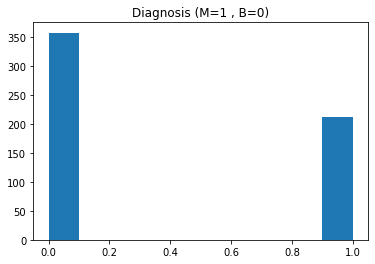

In [61]:
# Total Cases grouped by diagnosis


sqlContext.registerDataFrameAsTable(df, "data_table")

#df1=sqlContext.sql("SELECT Recovered,Deaths from Covid19 order by Deaths DESC").limit(10)

df1=sqlContext.sql("SELECT * FROM BreastCancer ")
dff=df1.toPandas()

dff['diagnosis'] = dff['diagnosis'].map({'M':1,'B':0})



dff.describe()
plt.hist(dff['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()



In [62]:

M = dff[(dff['diagnosis'] != 0)]
B = dff[(dff['diagnosis'] == 0)]
trace = go.Bar(x = (len(M), len(B)), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'red', 'green'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['benign','malignant'], values = dff['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['green', 'red'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [63]:
import plotly.figure_factory as ff
def plot_distribution(data_select, size_bin) :  
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['malignant', 'benign']
    colors = ['red', 'green']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [64]:
plot_distribution('radius_mean', .5)


In [65]:
plot_distribution('texture_mean', .5)

In [66]:
plot_distribution('perimeter_mean', 5)

In [67]:
plot_distribution('area_mean', 10)

In [68]:
plot_distribution('area_mean', 10)

In [69]:
plot_distribution('area_se', 10)

In [70]:
#correlation
correlation = dff.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [85]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

In [79]:
def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = M[feat1],
        y = M[feat2],
        name = 'malignant',
        mode = 'markers', 
        marker = dict(color = 'red',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = B[feat1],
        y = B[feat2],
        name = 'benign',
        mode = 'markers',
        marker = dict(color = 'green',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

plot_feat1_feat2('perimeter_mean','radius_worst')



In [80]:
plot_feat1_feat2('area_mean','radius_worst')

In [81]:
plot_feat1_feat2('texture_mean','texture_worst')

In [82]:
plot_feat1_feat2('area_worst','radius_worst')

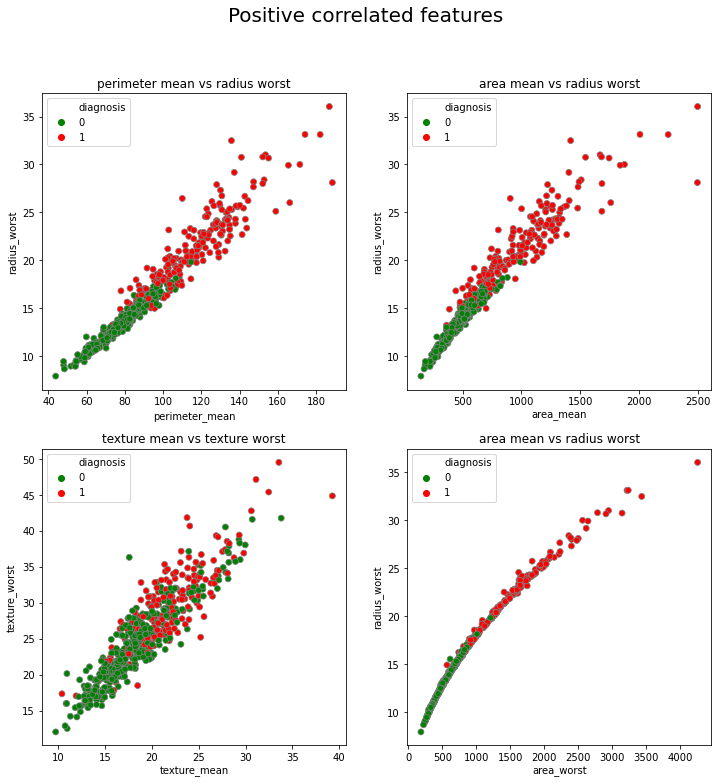

In [83]:
import seaborn as sns
palette ={0 : 'green', 1 : 'red'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = dff['perimeter_mean'], y = dff['radius_worst'], hue = "diagnosis",
                    data = dff, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = dff['area_mean'], y = dff['radius_worst'], hue = "diagnosis",
                    data = dff, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = dff['texture_mean'], y = dff['texture_worst'], hue = "diagnosis",
                    data = dff, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = dff['area_worst'], y = dff['radius_worst'], hue = "diagnosis",
                    data = dff, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('1')
plt.show()